<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Support Vector Machines (SVMs)

## Learning Objectives

*After this lesson, students will be able to:*
1. **Describe** linear separability.
2. **Differentiate between** maximal margin, soft-margin, and kernel SVMs
3. **Implement** SVMs in `scikit-learn`.
4. **Describe** the effects of `C` and kernels on SVMs.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

from sklearn.svm import LinearSVC, SVC
from sklearn import datasets

# Soft-Margin SVMs on the wine quality data

### Wine quality data
We'll read in the familiar wine quality data, except this time we'll attempt to predict whether wine is either red or white.

In [2]:
wine = pd.read_csv("../data/winequality_merged.csv")
wine.red_wine.value_counts(normalize=True)

0    0.753886
1    0.246114
Name: red_wine, dtype: float64

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
# Create X and y
X = wine.drop(columns=["red_wine", "quality"])

# We must scale our data for SVMs
# since we are both regularizing and using distance
sc = StandardScaler()
X_sc = sc.fit_transform(X)

y = wine["red_wine"]

#### Parameter: `C`
`C` controls how much we regularize the boundary that is fit between classes.
- **If `C` is small**: We regularize substantially, leading to a less perfect classification of our training data.
- **If `C` is large**: We do not regularize much, leading to a more perfect classification of our training data.

<details><summary>As we increase `C`, what happens to our bias-variance tradeoff?</summary>

- If C is small: We regularize substantially, leading to a less perfect classification of our training data. --> Bias increases, variance decreases.
- If C is large: We do not regularize much, leading to a more perfect classification of our training data. --> Bias decreases, variance increases.   
    
</details>

In [5]:
# C values to GridSearch over
pgrid = {"C": np.linspace(0.0001, 2, 10)}

In [6]:
# (THREAD) Instantiate and fit a gridsearch model for this SVC!
svc = LinearSVC(max_iter=20000)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gcv = GridSearchCV(svc, pgrid, cv=cv)
gcv.fit(X_sc, y);

In [7]:
# What is the best cross-validated score?
gcv.best_score_

0.994151122164979

In [8]:
# What is the best model?
gcv.best_params_

{'C': 1.1111555555555555}

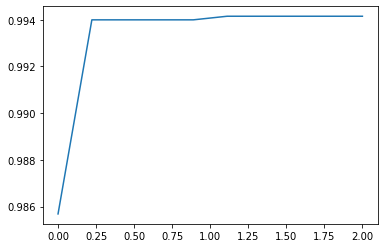

In [9]:
# Save cv results as a DataFrame
df = pd.DataFrame(gcv.cv_results_)

# Visualize how different values of C affect accuracy
plt.plot("param_C", "mean_test_score", data = df)

# Kernel SVMs on the MNIST data

### Hyperparameters of SVMs
SVMs will have two main hyperparameters: `C` and `kernel`.

#### Parameter: `C`
`C` controls how much we regularize the boundary that is fit between classes.
- **If `C` is small**: We regularize substantially, leading to a less perfect classification of our training data.
- **If `C` is large**: We do not regularize much, leading to a more perfect classification of our training data.

#### Parameter: `kernel`
There are several options:
* `linear`, `rbf`, `polynomial`, `sigmoid`, or something custom

**Which do we use?**
- **Quick answer**: As long as it's not the linear kernel, it actually matters surprisingly little!
- **Lazy answer**: Use the RBF kernel, as it's usually best (or no different from other options).
- **Better answer**: It's a model parameter that you're free to gridsearch over!

## Coding with [MNIST Digits Dataset](https://en.wikipedia.org/wiki/MNIST_database)

In [10]:
# Load digits.
digits = datasets.load_digits()

# Check out data.
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
# How many observations do we have?
# NOTE: Data is in a NumPy array!
print(type(digits.data))
digits.data.shape

<class 'numpy.ndarray'>


(1797, 64)

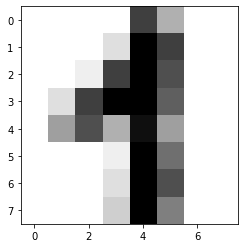

In [12]:
# Generate heatmap.
plt.imshow(
    digits.images[42],
    cmap=plt.cm.gray_r,
);

In [13]:
# What is the actual class?
digits.target[42]

1

In [14]:
# Create X and y.
X, y = digits.data, digits.target

In [15]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42
)

In [16]:
# Instantiate support vector machine.
svc = SVC(gamma="scale")

In [17]:
# Fit support vector machine to training data.
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
# Generate predictions.
y_pred = svc.predict(X_test)

In [19]:
# Measure performance based on accuracy.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9865319865319865

<details><summary>Is accuracy the best metric to use here? Why or why not?</summary>

- Accuracy is likely the best metric to use here. Improperly classifying a number is equally bad, no matter what number you incorrectly predict. For example, misclassifying a `4` as a `3` or `5` or `9` is equally bad.
- Many of our other classification metrics (like sensitivity and specificity) don't easily generalize to classification with more than two classes.
</details>

### Spend three minutes trying different hyperparameter values. (Feel free to guess and check or use GridSearch/RandomizedSearch!) We'll report our best values in a moment.

In [20]:
# Instantiate SVM.
svc = SVC(
    C = 100,
    kernel = "rbf",
    gamma = "scale"
)

# Fit on training data.
svc.fit(X_train, y_train)

# Evaluate model.
accuracy_score(y_test, svc.predict(X_test))

0.9882154882154882

In [21]:
# Import Pandas.
import pandas as pd

# Create DataFrame with column for predicted values.
results = pd.DataFrame(svc.predict(X_test), columns=['predicted'])

# Create column for observed values.
results['actual'] = y_test

In [22]:
# Check out first five rows.
results.head()

,predicted,actual
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2


In [23]:
# Find all indices where predicted and true results 
# aren't the same, then save in an array.
row_ids = results[results['predicted'] != results['actual']].index
print(row_ids)

Int64Index([133, 149, 159, 431, 470, 516, 557], dtype='int64')


In [24]:
# Create function that shows image, then 
# prints predicted and true values.
def print_number(index):
    plt.imshow(digits.images[index],
               cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.show()
    print(f'The model guessed this was: {results["predicted"].iloc[index]}.')
    print(f'This actually is: {results["actual"].iloc[index]}.')
    print()

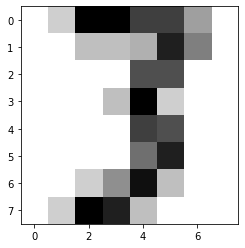

The model guessed this was: 9.
This actually is: 7.



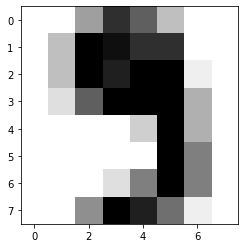

The model guessed this was: 5.
This actually is: 3.



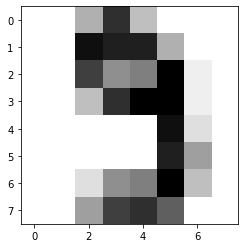

The model guessed this was: 7.
This actually is: 9.



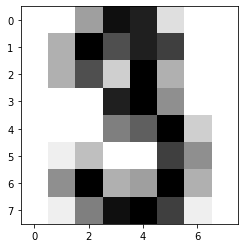

The model guessed this was: 2.
This actually is: 3.



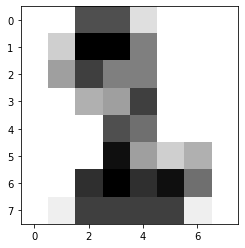

The model guessed this was: 9.
This actually is: 5.



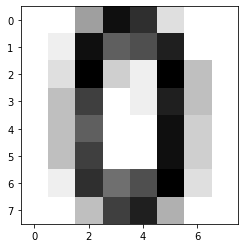

The model guessed this was: 8.
This actually is: 9.



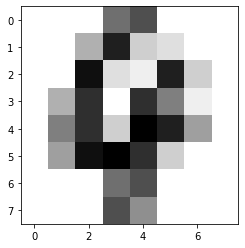

The model guessed this was: 1.
This actually is: 8.



In [25]:
# Use for loop to visualize all mistakes.

for value in row_ids:
    print_number(value)

### Support Vector Machines aren't even just for classification!

SVMs can be used for regression problems as well! The main ideas are the same - we still specify a cost tolerance `C` and a kernel - but [it's a bit more complicated](https://www.saedsayad.com/support_vector_machine_reg.htm). (For example, visualizing a "margin" is easier to do when we're separating two classes than when we're trying to predict some continuous outcome.) For this reason, we won't get into the mathematical details of support vector machines applied to regression, but we can instantiate a model using `svr = sklearn.svm.SVR()` and `.fit()`, `.predict()` like we do with all of our other models! Check out the documentation for [regression SVMs here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

### Pros and Cons of SVMs

#### Pros
- Exceptional perfomance (historically widely used)
- Effective in high-dimensional data
- Can work with non-linear boundaries
- Fast to compute with most datasets (kernel trick)

#### Cons
- Black box method
- Can be slow on large (tall) datasets

# Concluding Remarks and Fun Facts
* SVMs are fantastic models if all you care about is predictive ability.
* They are complete and total black boxes, sorry.
* You must scale your data.
* By the way, doing a kernel SVM with polynomial kernel degree = 2 has been shown to work really well for NLP data!